# Solving Optimization Problem with Qiskit

## Team name : SO(3)
It means Super Optimization. Shortly we call ourselves SO(3), because it looks like rotation group in physics.

### Team members
Kim BoSeong

Choi KwangJun

Kim HeeKang

Choi JaeWon

## Delivery Reward Maximization
__Delivery Reward Maximization(DRM)__ is a optimization problem. Suppose there are customers who want your goods. But you have limited time. Customers don't wait forever. Then how can you maximize your profit? __DRM__ will give you an answer.

Before telling what __DRM__ is, define the problem mathematically. Let $V=\{v_1,v_2,\cdots,v_n\}$ be the nodes, the customers, and $v_0$ be your store. Each customer has deadline $d(v_i)$ and reword $c(v_i)$. Your vehicle's speed is $s$. Path is denoted as edge. Weights of egdes $w(e_i,e_j)$ represent distance. There is also service time $t(v_i)$ that may represent the time needed to pass the goods. __DRM__ algorithm is hard. In this project, we consider a special case called __LDRM(Line Delivery Reward Maximization)__.

We modified __LDRM__ little. Assume that $v_0$ is at origin and customers were numbered sequentially, that is, nodes will like this $v_0,v_1,v_2,\cdots$. We added varibales $x_{11},x_{22},\cdots$ which represent whether the solution ends at $v_i$ or not. Also set variables $x_{ij}$, which implies that airplane stop by $j$th airport whose final destination is $i$. We added a constraint that $\sum\limits_{j<i} x_{ij}-ix_{ii}\leq 0$. Note that $x_{ii}$ is 1 if and only if the final destination is $i$. Then there are $i$ possible airport that airplane can stop by. So when $x_{ii}=0$, $x_{ij}$ is 0 for all $j$. Otherwise, airplane can choose airport before its destination.

## Into a real problem
Suppose the depot is in Incheon. You may deliver you goods by airplane. Since your goods require extremly cold environment, there is few airplane that can carry your goods. In this case, assume that only one airplane is available. Customers are in Shanghai, Hanoi and Suvarnabhmi. Roughly speaking, they are in a line fortunately. So this problem can be converted into __LDRM__.

In [1]:
#Import packages to visualization
from ipyleaflet import Map, AntPath, Marker
from itertools import combinations

In [2]:
#Instanciate map
m = Map(center=(25.500, 122.037), zoom=3)

#Longitude and latitude of airports
locations = {"INCHEON" : (37.46035,126.44061),"HANOI" : (21.21791,105.78959),"SHANGHAI" : (31.19992,121.33644),"SUVARNABHMI":(13.69036,100.74884)}
for location in locations.values():
    m.add_layer(Marker(location=location, draggable=False));
    
#Add pathes
for twoPoints in combinations(locations.values(),2):
    m.add_layer(AntPath(locations=
            [(twoPoints[0][0]+(twoPoints[1][0]-twoPoints[0][0])*i/10,twoPoints[0][1]+(twoPoints[1][1]-twoPoints[0][1])*i/10 ) for i in range(10)]
            ,dash_array=[1, 10],delay=1000,color='#7590ba',pulse_color='#3f6fba'))

m

Map(center=[25.5, 122.037], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

In [3]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit.circuit.library import RealAmplitudes
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.optimization import *
from qiskit.optimization.converters import *
from qiskit.optimization.algorithms import *
from qiskit.aqua import *
from qiskit.aqua.algorithms import *
from qiskit.aqua.operators import *
from qiskit.aqua.components.optimizers import COBYLA

import matplotlib.pyplot as plt
import numpy as np
from docplex.mp.model import Model
from qiskit import IBMQ
import pickle
with open('token.txt','rb') as file:
    token = pickle.load(file)
IBMQ.save_account(token)
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2021-02-19 03:18:18,965: Credentials already present. Set overwrite=True to overwrite.
/home/ec2-user/anaconda3/envs/Braket/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [4]:
qp = QuadraticProgram()
c = [3, 5, 2]
t = [1, 3, 2]
D = 7
D_temp = [1, 2, 3]
for i in range(3):
    for j in range(i+1):
        qp.binary_var('x'+f'{i+1}{j+1}')

qp.maximize(linear={'x11':c[0], 'x21':c[0], 'x22':c[1], "x31":c[0], 'x32':c[1],'x33':c[2]})
qp.linear_constraint(linear={'x11':1, 'x22':1, 'x33':1}, sense='E', rhs=1, name='select_i')
qp.linear_constraint(linear={'x21':1, 'x22':-1}, sense='L', rhs=0, name='x2cons')
qp.linear_constraint(linear={'x31':1, 'x32':1, 'x33':-2}, sense='L', rhs=0, name='x3cons')
qp.linear_constraint(linear={'x11':t[0]+D_temp[0], 'x21':t[0], 'x22':t[1]+D_temp[1], "x31":t[0], 'x32':t[1],'x33':t[2]+D_temp[2]}, sense='LE', rhs=D, name='deadline')
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Maximize
 obj: 3 x11 + 3 x21 + 5 x22 + 3 x31 + 5 x32 + 2 x33
Subject To
 select_i: x11 + x22 + x33 = 1
 x2cons: x21 - x22 <= 0
 x3cons: x31 + x32 - 2 x33 <= 0
 deadline: 2 x11 + x21 + 5 x22 + x31 + 3 x32 + 5 x33 <= 7

Bounds
 0 <= x11 <= 1
 0 <= x21 <= 1
 0 <= x22 <= 1
 0 <= x31 <= 1
 0 <= x32 <= 1
 0 <= x33 <= 1

Binaries
 x11 x21 x22 x31 x32 x33
End



In [5]:
ineq2eq = InequalityToEquality()
qp_eq = ineq2eq.convert(qp)
print(qp_eq.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Maximize
 obj: 3 x11 + 3 x21 + 5 x22 + 3 x31 + 5 x32 + 2 x33
Subject To
 select_i: x11 + x22 + x33 = 1
 x2cons: x21 - x22 + x2cons@int_slack = 0
 x3cons: x31 + x32 - 2 x33 + x3cons@int_slack = 0
 deadline: 2 x11 + x21 + 5 x22 + x31 + 3 x32 + 5 x33 + deadline@int_slack = 7

Bounds
 0 <= x11 <= 1
 0 <= x21 <= 1
 0 <= x22 <= 1
 0 <= x31 <= 1
 0 <= x32 <= 1
 0 <= x33 <= 1
       x2cons@int_slack <= 1
       x3cons@int_slack <= 2
       deadline@int_slack <= 7

Binaries
 x11 x21 x22 x31 x32 x33

Generals
 x2cons@int_slack x3cons@int_slack deadline@int_slack
End



In [6]:
int2bin = IntegerToBinary()
qp_eq_bin = int2bin.convert(qp_eq)
print(qp_eq_bin.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Maximize
 obj: 3 x11 + 3 x21 + 5 x22 + 3 x31 + 5 x32 + 2 x33
Subject To
 select_i: x11 + x22 + x33 = 1
 x2cons: x21 - x22 + x2cons@int_slack@0 = 0
 x3cons: x31 + x32 - 2 x33 + x3cons@int_slack@0 + x3cons@int_slack@1 = 0
 deadline: 2 x11 + x21 + 5 x22 + x31 + 3 x32 + 5 x33 + deadline@int_slack@0
           + 2 deadline@int_slack@1 + 4 deadline@int_slack@2 = 7

Bounds
 0 <= x11 <= 1
 0 <= x21 <= 1
 0 <= x22 <= 1
 0 <= x31 <= 1
 0 <= x32 <= 1
 0 <= x33 <= 1
 0 <= x2cons@int_slack@0 <= 1
 0 <= x3cons@int_slack@0 <= 1
 0 <= x3cons@int_slack@1 <= 1
 0 <= deadline@int_slack@0 <= 1
 0 <= deadline@int_slack@1 <= 1
 0 <= deadline@int_slack@2 <= 1

Binaries
 x11 x21 x22 x31 x32 x33 x2cons@int_slack@0 x3cons@int_slack@0
 x3cons@int_slack@1 deadline@int_slack@0 deadline@int_slack@1
 deadline@int_slack@2
End



In [7]:
lineq2penalty = LinearEqualityToPenalty()
qubo = lineq2penalty.convert(qp_eq_bin)
print(qubo.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Maximize
 obj: 663 x11 + 311 x21 + 1589 x22 + 311 x31 + 929 x32 + 1586 x33
      + 308 deadline@int_slack@0 + 616 deadline@int_slack@1
      + 1232 deadline@int_slack@2 + [ - 220 x11^2 - 176 x11*x21 - 968 x11*x22
      - 176 x11*x31 - 528 x11*x32 - 968 x11*x33 - 176 x11*deadline@int_slack@0
      - 352 x11*deadline@int_slack@1 - 704 x11*deadline@int_slack@2 - 88 x21^2
      - 352 x21*x22 - 88 x21*x31 - 264 x21*x32 - 440 x21*x33
      - 88 x21*x2cons@int_slack@0 - 88 x21*deadline@int_slack@0
      - 176 x21*deadline@int_slack@1 - 352 x21*deadline@int_slack@2 - 1188 x22^2
      - 440 x22*x31 - 1320 x22*x32 - 2288 x22*x33 + 88 x22*x2cons@int_slack@0
      - 440 x22*deadline@int_slack@0 - 880 x22*deadline@int_slack@1
      - 1760 x22*deadline@int_slack@2 - 88 x31^2 - 352 x31*x32 - 264 x31*x33
      - 88 x31*x3cons@int_slack@0 - 88 x31*x3cons@int_slack@1
      - 88 x31*deadline@int_slack@0 - 176 x31*deadli

In [8]:
aqua_globals.random_seed = 20000
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), 
                                  seed_simulator=aqua_globals.random_seed, 
                                  seed_transpiler=aqua_globals.random_seed)

In [9]:
#sensitivity analysis, initial point

ip_list = []

for a in range(7):
    temp = list(np.random.randn(8))
    ip_list.append(temp)

for _, List in enumerate(ip_list):
    qaoa_mes = QAOA(quantum_instance=quantum_instance, p=4, initial_point=List)
    exact_mes = NumPyMinimumEigensolver()
    qaoa = MinimumEigenOptimizer(qaoa_mes)
    exact = MinimumEigenOptimizer(exact_mes)
    qaoa_result = qaoa.solve(qubo)
    exact_result = exact.solve(qubo)
    print(f'when initial point = {List}, exact_result : {exact_result}')
    print(f'when initial point = {List}, qaoa_result : {qaoa_result}')

when initial point = [2.9342368224368784, 0.5977572412604643, -0.2441037257837922, -1.022904121232033, 0.409506877379413, -0.029768238782648497, -0.022061659822854487, -1.4486959299225217], exact_result : optimal function value: 8.0
optimal value: [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
status: SUCCESS
when initial point = [2.9342368224368784, 0.5977572412604643, -0.2441037257837922, -1.022904121232033, 0.409506877379413, -0.029768238782648497, -0.022061659822854487, -1.4486959299225217], qaoa_result : optimal function value: -20.0
optimal value: [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
status: SUCCESS
when initial point = [0.8390810316779921, -0.5300804431495929, 1.1747051244674165, -1.5792291578630162, -1.4161308523607739, 0.5360878201820598, -0.3878128615363827, -0.5240311309554735], exact_result : optimal function value: 8.0
optimal value: [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
status: SUCCESS
when initial point = [0.8390810316779921, -0.5300804431495929, 1.1747051244674165, -1.579229157

In [10]:
# to_ising

op, offset = qubo.to_ising()
print('offset: {}'.format(offset))
print('operator:')
print(op)

offset: 1122.5
operator:
SummedOp([
  -229.5 * IIIIIIIIIIIZ,
  -119.5 * IIIIIIIIIIZI,
  -547.5 * IIIIIIIIIZII,
  -130.5 * IIIIIIIIZIII,
  -349.5 * IIIIIIIZIIII,
  -516.0 * IIIIIIZIIIII,
  -110.0 * IIZIIIIIIIII,
  -220.0 * IZIIIIIIIIII,
  -440.0 * ZIIIIIIIIIII,
  22.0 * IIIIIIIIIIZZ,
  121.0 * IIIIIIIIIZIZ,
  44.0 * IIIIIIIIIZZI,
  22.0 * IIIIIIIIZIIZ,
  11.0 * IIIIIIIIZIZI,
  55.0 * IIIIIIIIZZII,
  66.0 * IIIIIIIZIIIZ,
  33.0 * IIIIIIIZIIZI,
  165.0 * IIIIIIIZIZII,
  44.0 * IIIIIIIZZIII,
  121.0 * IIIIIIZIIIIZ,
  55.0 * IIIIIIZIIIZI,
  286.0 * IIIIIIZIIZII,
  33.0 * IIIIIIZIZIII,
  143.0 * IIIIIIZZIIII,
  11.0 * IIIIIZIIIIZI,
  -11.0 * IIIIIZIIIIII,
  -11.0 * IIIIIZIIIZII,
  11.0 * IIIIZIIIZIII,
  -22.0 * IIIIZIIIIIII,
  11.0 * IIIIZIIZIIII,
  -22.0 * IIIIZIZIIIII,
  11.0 * IIIZIIIIZIII,
  -22.0 * IIIZIIIIIIII,
  11.0 * IIIZIIIZIIII,
  -22.0 * IIIZIIZIIIII,
  11.0 * IIIZZIIIIIII,
  22.0 * IIZIIIIIIIIZ,
  11.0 * IIZIIIIIIIZI,
  55.0 * IIZIIIIIIZII,
  11.0 * IIZIIIIIZIII,
  33.0 * IIZIII

In [11]:
#VQE using CVaR

maxiter = 60
optimizer = COBYLA(maxiter=maxiter)

var_form = RealAmplitudes(op.num_qubits, reps=1)
m = var_form.num_parameters

backend_name = 'qasm_simulator'
backend = Aer.get_backend(backend_name)

alphas = [0.75, 0.50, 0.25, 0.2, 0.125]

In [12]:

objectives = {alpha: [] for alpha in alphas}
results = {}

def callback(i, params, obj, stddev, alpha):
    objectives[alpha] += [-(obj + offset)]

for alpha in alphas:
    
    cvar_exp = CVaRExpectation(alpha, PauliExpectation())
    cvar_exp.compute_variance = lambda x: [0]
    
    vqe = VQE(expectation=cvar_exp, optimizer=optimizer, var_form=var_form,
              quantum_instance=backend, callback=lambda i, params, obj, stddev: callback(i, params, obj, stddev, alpha))
    
    opt_alg = MinimumEigenOptimizer(vqe)
    
    results[alpha] = opt_alg.solve(qubo)
    
    print(f'alpha = {alpha}')
    print(results[alpha])
    print()

alpha = 0.75
optimal function value: 5.0
optimal value: [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.]
status: SUCCESS

alpha = 0.5
optimal function value: 8.0
optimal value: [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
status: SUCCESS

alpha = 0.25
optimal function value: -17.0
optimal value: [0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.]
status: SUCCESS

alpha = 0.2
optimal function value: 5.0
optimal value: [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
status: SUCCESS

alpha = 0.125
optimal function value: -14.0
optimal value: [0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
status: SUCCESS



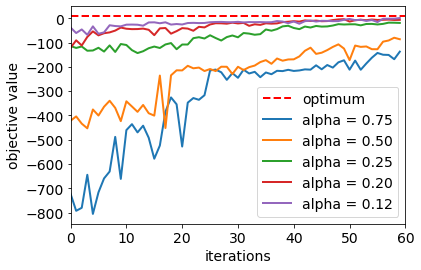

In [13]:

plt.plot([0, maxiter], [exact_result.fval, exact_result.fval], 'r--', linewidth=2, label='optimum')
for alpha in alphas:
    plt.plot(objectives[alpha], label='alpha = %.2f' % alpha, linewidth=2)
plt.legend(loc='lower right', fontsize=14)
plt.xlim(0, maxiter)
plt.xticks(fontsize=14)
plt.xlabel('iterations', fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('objective value', fontsize=14)
plt.show()

## Conclusion
There are many __NP-HARD__ problems in real world. Any computer, even a supercomputer, can solve these problems. It is impossible to get exact solution. But if we don't have to get the best solution, if we can be satisfied with optimized solution, we can get a solution faster. Still, for large data, some optimization algorithm are slow. In this case quantum computing can be a solution. Using quantum speedup, one can get optimized solution in reasonable time.

## Appendix : DRM is NP-HARD
We will follow the step that the paper shows. Suppose there is no weight and deadline is constant. Then it is a special case of __DRM__. This problem is described as

Maximize $c(v_i)$

Subject to

$\sum t(v_i) \leq D$

Remember knapsack problem. The bag has limited weight and you want to maximize value.

Maximize $v(x_i)$

Subject to

$\sum w(x_i) \leq W$

As you can check two are equivalent. Since __knapsack problem__ is __NP-HARD__ problem, so is __DRM__.

In [14]:
#Import packages about qiskit
from qiskit import BasicAer
from qiskit.aqua import aqua_globals, QuantumInstance
from qiskit.aqua.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.optimization.algorithms import MinimumEigenOptimizer, RecursiveMinimumEigenOptimizer
from qiskit.optimization import QuadraticProgram

In [15]:
from docplex.mp.model import Model
model = Model(name='knapsack')

#Define the number of items
numOfItem=5

#Define variable which represent whether item is in bag or not.
isUsed = [model.binary_var(name='Item #'+str(i)) for i in range(numOfItem)]

#Weight and cost for each item
weight = [40,90,120,100,200]
cost = [40,25,40,20,60]

weightLimit = 300

model.add_constraint(sum([isUsed[i]*weight[i] for i in range(numOfItem)])-weightLimit<=0,'Weight limit')
model.maximize(sum([isUsed[i]*cost[i] for i in range(numOfItem)]))
print(model.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: knapsack

Maximize
 obj: 40 Item_#0 + 25 Item_#1 + 40 Item_#2 + 20 Item_#3 + 60 Item_#4
Subject To
 Weight_limit: 40 Item_#0 + 90 Item_#1 + 120 Item_#2 + 100 Item_#3 + 200 Item_#4
                <= 300

Bounds
 0 <= Item_#0 <= 1
 0 <= Item_#1 <= 1
 0 <= Item_#2 <= 1
 0 <= Item_#3 <= 1
 0 <= Item_#4 <= 1

Binaries
 Item_#0 Item_#1 Item_#2 Item_#3 Item_#4
End



In [16]:
def compareQE(model):
    aqua_globals.random_seed = 10598
    quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'),
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)
    qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0., 0.])
    qaoa = MinimumEigenOptimizer(qaoa_mes)
    qaoa_result = qaoa.solve(mod)
    print('QAOA result')
    print(qaoa_result)
    exact_mes = NumPyMinimumEigensolver()
    exact = MinimumEigenOptimizer(exact_mes)
    exact_result = exact.solve(mod)
    print('Exact result')
    print(exact_result)

In [17]:
#Change to use qiskit
mod = QuadraticProgram()
mod.from_docplex(model)
compareQE(mod)

QAOA result
optimal function value: 105.0
optimal value: [1. 1. 1. 0. 0.]
status: SUCCESS
Exact result
optimal function value: 105.0
optimal value: [1. 1. 1. 0. 0.]
status: SUCCESS


## Reference
[1] Chuanwen Luo, Deying Li, Xingjian Ding, Weili Wu, __*Delivery Route Optimization with automated vehicle in smart urban environment*__, Theoretical Computer Science 836(2020), 42-52

[2] Edward Farhi, Jeffrey Goldstone, Sam Gutmann, __*A Quantum Approximate Optimization Algorithm*__, arXiv:1411.4028